In [117]:
### Benjamin Tollison ###
import sympy as sp
from IPython.display import display, Math, Latex
from sympy.solvers.solveset import linsolve
from sympy.solvers.pde import pdsolve
from sympy import  lambdify, Matrix,sin,cos, sinh, cosh, exp, pi, symbols, integrate, Function, Eq
import numpy as np
import matplotlib.pyplot as plt
import itertools
def displayEquations(LHS,RHS):
    left = sp.latex(LHS)
    right = sp.latex(RHS)
    display(Math(left + '=' + right))
    np.set_printoptions(suppress=True)

In [118]:
# optional
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

In [119]:
# a
x1,x2,x3,x4,x5,x6 = symbols('x_1,x_2,x_3,x_4,x_5,x_6')
F1,F2,F3,M1,M2,M3 = symbols('F_1,F_2,F_3,M_1,M_2,M_3')
x = Matrix([x1,x2,x3,x4,x5,x6])
b = Matrix([F1,F2,F3,M1,M2,M3])

In [120]:
Thrust_location = np.array([
  [2,-8,-8],
  [-8,-2,-8],
  [8,-8,-2],
  [8,2,8],
  [-8,8,2],
  [-2,8,8]
])
Thrust_direction = np.array([
  [-1,0,0],
  [0,1,0],
  [0,0,1],
  [0,-1,0],
  [0,0,-1],
  [1,0,0]
])
# Forces
A = np.zeros(shape=(6,6))
for row in range(3):
  for column in range(6):
    A[row][column] = Thrust_direction.T[row][column]
# M_x
for thrust_number in range(6):
  r = Thrust_location[thrust_number][1:]
  F = Thrust_direction[thrust_number][1:]
  A[3][thrust_number] = np.cross(r,F)
# M_y
for thrust_number in range(6):
  r = Thrust_location[thrust_number][:]
  r = np.delete(r,1,0)
  F = Thrust_direction[thrust_number][:]
  F = np.delete(F,1,0)
  A[4][thrust_number] = np.cross(r,F)
# M_z
for thrust_number in range(6):
  r = Thrust_location[thrust_number][:2]
  F = Thrust_direction[thrust_number][:2]
  A[5][thrust_number] = np.cross(r,F)
print(A)
# displayEquations('A',A)

[[-1.  0.  0.  0.  0.  1.]
 [ 0.  1.  0. -1.  0.  0.]
 [ 0.  0.  1.  0. -1.  0.]
 [ 0.  8. -8.  8. -8.  0.]
 [-8.  0.  8.  0.  8. -8.]
 [-8. -8.  0. -8.  0. -8.]]


In [121]:
# b
x = np.array([1,1,0,0,1,0])
b = np.matmul(A,x)
displayEquations('b',b)

<IPython.core.display.Math object>

In [122]:
# c
moment_only_combinations = []
thrust_combinations = list(itertools.product([0, 1], repeat=6))
for instance in thrust_combinations:
  x = instance
  b = np.matmul(A,x)
  if b[0] == 0 and b[1] == 0 and b[2] == 0:
    moment_only_combinations.append(instance)
print(moment_only_combinations)
for i in moment_only_combinations:
  print(np.matmul(A,np.array(i)))
print(len(thrust_combinations))

[(0, 0, 0, 0, 0, 0), (0, 0, 1, 0, 1, 0), (0, 1, 0, 1, 0, 0), (0, 1, 1, 1, 1, 0), (1, 0, 0, 0, 0, 1), (1, 0, 1, 0, 1, 1), (1, 1, 0, 1, 0, 1), (1, 1, 1, 1, 1, 1)]
[0. 0. 0. 0. 0. 0.]
[  0.   0.   0. -16.  16.   0.]
[  0.   0.   0.  16.   0. -16.]
[  0.   0.   0.   0.  16. -16.]
[  0.   0.   0.   0. -16. -16.]
[  0.   0.   0. -16.   0. -16.]
[  0.   0.   0.  16. -16. -32.]
[  0.   0.   0.   0.   0. -32.]
64


In [123]:
# 2
a,b,omega,t = symbols('a b \\omega,t')
eqn1 = sp.sin(omega*t) * (-a*omega**2-b*omega-a) - sp.sin(omega*t)
eqn2 = sp.cos(omega*t) * (-b*omega**2 + a*omega - b)
dof = sp.linsolve([eqn1,eqn2],[a,b])
a_solution,b_solution = next(iter(dof))
displayEquations('a',a_solution)
displayEquations('b',b_solution)
x_p = a*sin(omega*t) + b*cos(omega*t)
displayEquations('x_p',x_p.subs({a:a_solution,b:b_solution}))
# x_p = x_p.subs({a:a_solution,b:b_solution})
s,s1,s2,c1,c2 = symbols('s s_1 s_2 c_1 c_2')
characteristic_equation = s**2 + s - 1
s1_solution,s2_solution = sp.solve(characteristic_equation,s)
x_h = c1*sp.exp(s1*t) + c2*sp.exp(s2*t)
x_h = x_h.subs({s1:s1_solution,s2:s2_solution})
x_0,dot_x_0 = symbols('x_0 \\dot{x}_0')
intial_condition_1 = x_0
intial_condition_2 = dot_x_0
x_t = x_h + x_p
eqn3 = x_t.subs(t,0) - intial_condition_1
eqn4 = x_t.diff(t).subs(t,0) - intial_condition_2
dof = sp.linsolve([eqn3,eqn4],[c1,c2])
c1_solution,c2_solution = next(iter(dof))
# x_h = x_h.subs({c1:c1_solution,c2:c2_solution})
x_t = x_t.subs({c1:c1_solution,c2:c2_solution})
displayEquations('x_h',x_h.subs({x_0:1,dot_x_0:1}))
displayEquations('x_t',x_t)
print(a_solution)
print(b_solution)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

-\omega**2/(\omega**4 + 3*\omega**2 + 1) - 1/(\omega**4 + 3*\omega**2 + 1)
-\omega/(\omega**4 + 3*\omega**2 + 1)


In [124]:
# part 3 converting sympy to numpy
displayEquations(c1,c1_solution.subs({x_0:1,dot_x_0:1}).collect(a).collect(b))
displayEquations(c2,c2_solution.subs({x_0:1,dot_x_0:1}).collect(a).collect(b))
c1_exact = c1_solution.subs({x_0:1,dot_x_0:1,a:a_solution,b:b_solution})
c2_exact = c2_solution.subs({x_0:1,dot_x_0:1,a:a_solution,b:b_solution})
c1_exact = c1_exact.subs(omega,1)
c2_exact = c2_exact.subs(omega,1)
a_exact = a_solution.subs(omega,1)
b_exact = b_solution.subs(omega,1)
displayEquations(c1,c1_exact)
displayEquations(c2,c2_exact)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

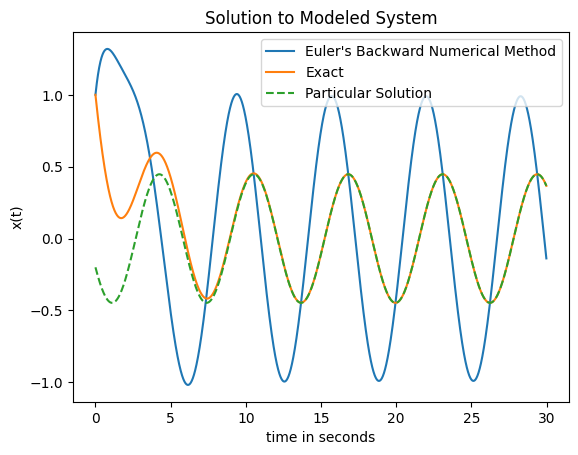

In [125]:
# 3
# Numerical
delta_t = 0.01
time = np.arange(0,30,delta_t)
x_values = np.zeros((len(time),2))
x_values[0,0] = 1
x_values[0,1] = 1
omega = 1
for i, t in enumerate(time[:-1]):
  denominator = 1 + delta_t + delta_t**2
  x_values[i+1,0] = (x_values[i,0] +delta_t*x_values[i,0]+delta_t*x_values[i,1]+delta_t**2*np.sin(omega*t)) / denominator
  x_values[i+1,1] = (x_values[i,1] + delta_t*np.sin(omega*t) - delta_t*x_values[i,0]) / denominator
# Exact
def x_exact(t):
  x_homogenous = c1_exact * np.exp(-t/2) + c2_exact * np.exp(-t/2)
  x_particular = a_exact * np.sin(t) + b_exact * np.cos(t)
  x_t = x_homogenous + x_particular
  return x_t
x_particular_solution_only = lambda t: a_exact * np.sin(t) + b_exact * np.cos(t)
plt.plot(time,x_values[:,0], label="Euler's Backward Numerical Method")
plt.plot(time,x_exact(time),label ='Exact')
plt.plot(time,x_particular_solution_only(time),label='Particular Solution',linestyle='dashed')
plt.legend()
plt.ylabel("x(t)")
plt.xlabel("time in seconds")
plt.title("Solution to Modeled System")
plt.show()